In [3]:
#Import required packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline

In [4]:
#Loads the text file and making it an array
#Skips the first row (header row)
# .T transposes the rows and columns since we want to take data on columns instead of rows

X=np.asarray(np.loadtxt('/Users/dylanhilligoss/vh1/1d_test2/tdsw1MD.init', skiprows=1)).T


In [5]:
#Identfies what each column cooresopnds to

Radius=X[1]
R1=Radius+1
Velocity=X[2]
Density=X[3]

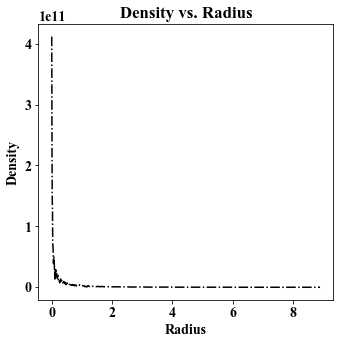

In [6]:
#Plots Density as a function of Radius

fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})
plt.plot(Radius,Density, color='k',ls='-.')
plt.title("Density vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Density")
plt.tight_layout()

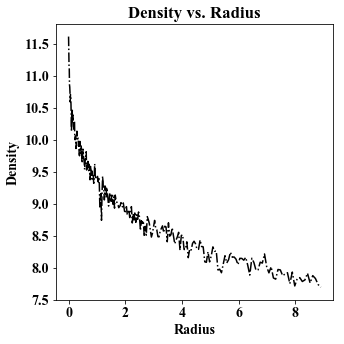

In [7]:
#Plots Density as a function of Radius on a log plot scale

fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})
plt.plot(Radius, np.log10(Density), color='k',ls='-.')
plt.title("Density vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Density")
plt.tight_layout()

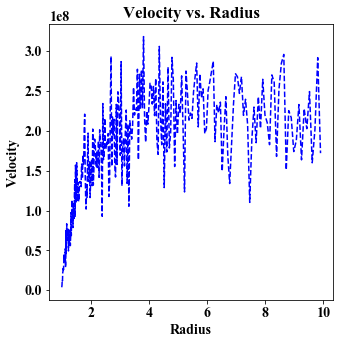

In [8]:
#Plots Velocity as a function of Radius

fig=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})
plt.plot(R1, Velocity, color='b',ls='--')
plt.title("Velocity vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Velocity")
plt.tight_layout()

Text(0.5,0,'Radius')

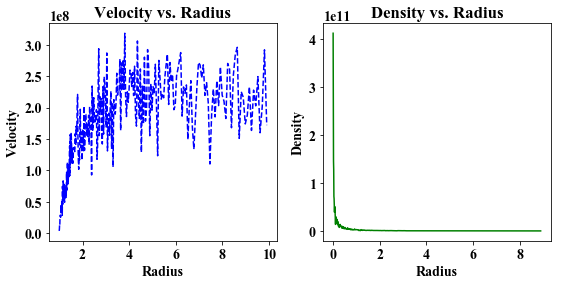

In [9]:
#Creates two plots simultaneously

fig=plt.figure(figsize=(9,4))
plt.rcParams.update({'font.size':14, 'font.family':'Times new roman'})

ax0 = fig.add_subplot(1,2,1)
ax0.plot(R1,Velocity, color='b', ls='--')
ax0.set_title("Velocity vs. Radius")
ax0.set_ylabel("Velocity")
ax0.set_xlabel("Radius")

ax1 = fig.add_subplot(1,2,2)
ax1.plot(Radius,Density, color='g', ls='-')
ax1.set_title("Density vs. Radius")
ax1.set_ylabel("Density")
ax1.set_xlabel("Radius")


In [10]:
#Definition of the Beta Velocity Law

def beta_velocity(x,beta,vi):

    return vi*(1-(1/x))**beta

[  6.87516229e-01   2.55845247e+08]


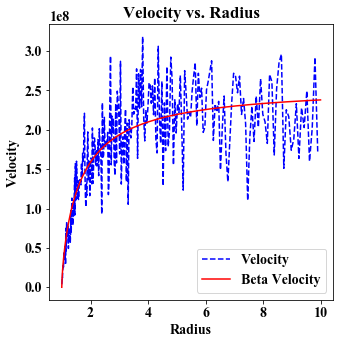

In [11]:
#Curve fitting our obtained velocity to that of the Beta Velocity Law
#popt shows our fitted values for our independent variable
#pcov shows the fitted covariance

popt, pcov = curve_fit(beta_velocity, R1, Velocity,p0=[1.2,3.e8])

#prints values for our independent variables (vi and beta)

print(popt)

#creates a variable that runs along a range of values (as obtained from our above velocity plot)

xval = np.linspace(1.,10.,901)

#creates a variable calculating the beta velocity over the array of xvval using the fitted values of vi and beta

yval = beta_velocity(xval, popt[0], popt[1])


#plots the fitted results

fig=plt.figure(figsize=(5,5))
plt.plot(R1, Velocity, color='b',ls='--',label='Velocity')
plt.plot(xval,yval,color='r',label='Beta Velocity')
plt.title("Velocity vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Velocity")
plt.legend(loc='best')
plt.tight_layout()

In [12]:
#calculates the mass-loss rate at a specific value in the file

Mdot = (4*np.pi*R1[50]**2*Density[50]*Velocity[50])
print(Mdot)

2.37750029527e+19


Text(0,0.5,'Mass-Loss Rate')

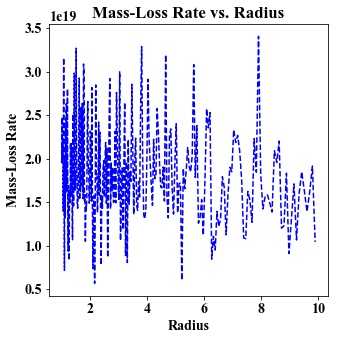

In [13]:
#Plots the mass-loss rate as a function of radius

fig=plt.figure(figsize=(5,5))
plt.plot(R1, 4*np.pi*R1**2*Density*Velocity, color='b',ls='--')
plt.title("Mass-Loss Rate vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Mass-Loss Rate")